# Final Project

# Introduction and Background

Music is a very popular part of our culture and it has become more and more accessible to listeners. Many individuals purchase these different music streaming services such as Spotify, Apple music, Amazon music, Google play, etc. Songs at the top of the charts are streamed millions of times. This brings into question what makes a song more popular and a worthwhile listen? There are many components that make up a song, such as acoustics, danceability, energy, tempo, loudness, etc. We set out to figure out if there is a relationship between these different components and a song’s popularity in terms of streams on Spotify. 

Past studies have shown us that the tempo of a song is directly correlated with our emotional response to that song. They found that a slower tempo makes us feel sadder while a higher tempo makes us feel happier [1]. Another study found that songs with a higher tempo are associated with higher energy and thus, are more likely to make us want to dance [2]. These studies seem to imply that a songs makeup can have a big effect on our mood. The extent to which this translates to a song’s popularity is our main focus for this project.

References:

[1] https://sonicscoop.com/2014/06/19/the-resonant-human-the-science-of-how-tempo-affects-us/

[2]https://www.washingtonpost.com/news/to-your-health/wp/2015/10/30/the-mathematical-formula-behind-feel-good-songs/?noredirect=on&utm_term=.4af1c700d58a

# Group Members and Contributions 

__Michael Zuazo__ (A14053855)
- Background and Prior Work
- Data Cleaning / Pre-processing
- Data Visualization

__Yash Garde__ (A14582488)
- Data Cleaning / Pre-processing
- Data Analysis
- Conclusion

__Wang Linxuan__ (A92108203)
- Data Cleaning / Pre-processing
- Data Visualization
- Data Analysis
- Prediction Models

__Juan Tapia__ (A13881309)
- Introduction
- Ethics and Privacy
- Discussion / Conclusion

# Research Question

To what extent do the different components that make up a song allow us to predict its popularity, in terms of streams on Spotify?


# Hypothesis

We predict that components that are associated with happiness, such as tempo, energy, and danceability will allow us to predict a song’s popularity. Specifically we predict that as tempo/energy/danceability increases, so will the number of streams.

# Datasets Used

- Spotify Song Attributes Dataset
  - Number of Observations: 2017
  - Source: https://www.kaggle.com/geomack/spotifyclassification
  - This dataset contains the attributes of the top 2017 songs of the year 2017 such as loudness, acousticness, tempo, energy etc. We will be using this data to determine which of these features impacted the popularity of any given song in 2017.
  
- Spotify Worldwide Daily Song Rankings Dataset
  - Number of Observations: 3.44 million
  - Source: https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking
  - This dataset contains information about the number of daily streams the top 200 songs got for every day in the years 2017 and 2018. We will be accumulating the number of streams each song got in order to guage the popularity of any given song.
  
We will merge this data by creating a unique key in the form of the song name followed by the artist. In order to get the total number of streams for any given song, we will have to iterate through the daily song ranking dataset and sum up all the streams it accumulated over the year.
Our final dataset will contain the name of the song, the artist, the attributes of that song and the number of streams it accumulated.

# Setup

We will begin by importing all the required packages that we will use for our analysis.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import os
import bs4
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import seaborn as sns

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Data Wrangling and Cleaning

We begin by reading in our two datasets specified above. The dataset containing the information about the features of the songs will be read into the DataFrame df_tempo and the large dataset containing information about the number of daily streams will be read into the DataFrame df_pop1.

In [2]:
df_tempo = pd.read_csv('data.csv')
df_pop1 = pd.read_csv('popularity_data.csv')

We will now have to remove any columns that are not critical to our analysis.

Our streams dataset (df_pop1) has many extraneous columns such as Position, URL, Date and Region of the song. We will ignore these fields and only focus on the Track Name, Artist and Streams field. In addition, we will also rename the fields to be consistent with the df_tempo dataset.

In [3]:
df_pop1 = df_pop1[['Track Name', 'Artist', 'Streams']]
df_pop1.columns = ['song_title', 'artist', 'streams']

The next step will be to merge these two datasets on a common column. We could not simply merge the dataframe on the song title as different artists may put out songs with the same title.
To combat this, we create a unique key using the song title and the artist put together in both the datasets so that we may merge the datasets later.

In [4]:
df_tempo['uniq_id'] = df_tempo['artist'].str.cat(df_tempo[['song_title']], sep=' - ')
df_pop1['uniq_id'] = df_pop1['artist'].str.cat(df_pop1[['song_title']], sep=' - ')
df_tempo

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,uniq_id
0,0,0.010200,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future,Future - Mask Off
1,1,0.199000,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino,Childish Gambino - Redbone
2,2,0.034400,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future,Future - Xanny Family
3,3,0.604000,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House,Beach House - Master Of None
4,4,0.180000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys,Junior Boys - Parallel Lines
5,5,0.004790,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4,0.264,1,Sneakin’,Drake,Drake - Sneakin’
6,6,0.014500,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4,0.308,1,Childs Play,Drake,Drake - Childs Play
7,7,0.020200,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4,0.393,1,Gyöngyhajú lány,Omega,Omega - Gyöngyhajú lány
8,8,0.048100,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4,0.398,1,I've Seen Footage,Death Grips,Death Grips - I've Seen Footage
9,9,0.002080,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4,0.386,1,Digital Animal,Honey Claws,Honey Claws - Digital Animal


Before we can merge the dataframes on this new unique identity column we created, we have to accumulate the number of streams for every song between all the days that are present in the dataset. This is so that we can have a total count of the number of streams a given song had in the year 2017 which is our measure of the popularity of the song.

In [5]:
df_pop1 = df_pop1.groupby(['uniq_id'])['streams'].sum()
df_pop1 = df_pop1.to_frame().reset_index()

Once the number of streams for each song has been summed up, we are ready to merge the two dataframes together on our unique identifer column.

In [6]:
df_final = df_tempo.merge(df_pop1, on = 'uniq_id')
df_final

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,uniq_id,streams
0,0,0.010200,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future,Future - Mask Off,1006341171
1,1173,0.010200,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,0,Mask Off,Future,Future - Mask Off,1006341171
2,1,0.199000,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino,Childish Gambino - Redbone,611080489
3,5,0.004790,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4,0.264,1,Sneakin’,Drake,Drake - Sneakin’,86903911
4,6,0.014500,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4,0.308,1,Childs Play,Drake,Drake - Childs Play,1817339
5,13,0.366000,0.762,243270,0.476,0.000000,0,0.1030,-12.686,1,0.1140,130.007,4,0.367,1,One Night,Lil Yachty,Lil Yachty - One Night,22048775
6,14,0.440000,0.662,247288,0.603,0.000000,9,0.0972,-8.317,0,0.0793,125.011,4,0.351,1,Oh lala,PNL,PNL - Oh lala,125301
7,28,0.051600,0.782,228562,0.572,0.000000,4,0.3300,-7.467,0,0.0385,120.021,4,0.237,1,Look Alive,Rae Sremmurd,Rae Sremmurd - Look Alive,270233
8,37,0.056500,0.853,205879,0.547,0.000000,1,0.3410,-7.535,1,0.1940,142.065,4,0.677,1,Jumpman,Drake,Drake - Jumpman,46905737
9,45,0.006310,0.715,213093,0.833,0.000000,2,0.1640,-5.379,1,0.1080,95.487,4,0.607,1,Return Of The Mack - C & J Street Mix,Mark Morrison,Mark Morrison - Return Of The Mack - C & J Str...,92362


Upon merging, we noticed two things:
- The total number of observation dropped significantly as our two datasets were independently maintained and hence the overlap may not have been very large.
- There are a few cases of duplicate songs being present in the merged dataframe which we will have to handle

So our analysis is not skewed, we must first remove the duplicates from the merged dataframe.

In [7]:
df_final = df_final.drop_duplicates(subset='uniq_id', keep='first')
df_final = df_final.reset_index(drop=True)

In order to be working in more conventional units, we decided to change the unit of music duration from ms to second.

In [8]:
df_final['duration_ms'] = df_final['duration_ms']/1000
df_final.rename(columns={'duration_ms':'duration'}, inplace=True)

In order to prevent having to run the cleaning code every single time, we decided to store our merged dataset into an independent csv for efficiency.

In [9]:
df_final.to_csv('finaldata.csv')
df_final

,Unnamed: 0,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,uniq_id,streams
0,0,0.010200,0.833,204.600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future,Future - Mask Off,1006341171
1,1,0.199000,0.743,326.933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino,Childish Gambino - Redbone,611080489
2,5,0.004790,0.804,251.333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4,0.264,1,Sneakin’,Drake,Drake - Sneakin’,86903911
3,6,0.014500,0.739,241.400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4,0.308,1,Childs Play,Drake,Drake - Childs Play,1817339
4,13,0.366000,0.762,243.270,0.476,0.000000,0,0.1030,-12.686,1,0.1140,130.007,4,0.367,1,One Night,Lil Yachty,Lil Yachty - One Night,22048775
5,14,0.440000,0.662,247.288,0.603,0.000000,9,0.0972,-8.317,0,0.0793,125.011,4,0.351,1,Oh lala,PNL,PNL - Oh lala,125301
6,28,0.051600,0.782,228.562,0.572,0.000000,4,0.3300,-7.467,0,0.0385,120.021,4,0.237,1,Look Alive,Rae Sremmurd,Rae Sremmurd - Look Alive,270233
7,37,0.056500,0.853,205.879,0.547,0.000000,1,0.3410,-7.535,1,0.1940,142.065,4,0.677,1,Jumpman,Drake,Drake - Jumpman,46905737
8,45,0.006310,0.715,213.093,0.833,0.000000,2,0.1640,-5.379,1,0.1080,95.487,4,0.607,1,Return Of The Mack - C & J Street Mix,Mark Morrison,Mark Morrison - Return Of The Mack - C & J Str...,92362
9,54,0.246000,0.676,254.769,0.528,0.000000,7,0.0803,-8.699,1,0.0366,130.073,4,0.301,1,White Iverson,Post Malone,Post Malone - White Iverson,311510902


We also want to gain a better understanding of which genre of music is most popular amongst our data. To do this, we will do
some web scaping to get the genre off of Wikipedia. Since not every song has a Wikipedia page, we decided to instead look at
the Wikipedia pages of each of the artists in our dataframe. This gave us info on which genres each particular artist falls 
under. Since each artist produces music under multiple genres, our counts will not match exactly with the number of rows in 
our dataframe. However, we will still be able to see how popular each genre is relative to one another. 

Since there are hundereds of nuanced genres, we lumped together genres with slight variations such as 'electro house' and 
'future house' under the umberella genre of 'house'. This makes the results easier to interpret while still highlighting the 
differences among major genres. The list of genres we kept track of was made by looking at the genres of the artists in our
dataset and noting down the most common ones.

In [10]:
#Initialize the genre counts to 0
edm, pop, house, alternative, rock, trap, hip_hop, r_b, country, reggaeton, indie, dance, funk, soul, reggae, other = 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df_artists = df_final[['artist']].copy()

#Drop the following rows in the genre dataframe because the artists either do not have Wikipedia pages or their name 
#does not match their Wikipedia page
df_artists = df_artists.drop(df_artists[(df_artists['artist'] == 'IAmChino')].index)
df_artists = df_artists.drop(df_artists[(df_artists.artist == 'Xantos')].index)
df_artists = df_artists.drop(df_artists[(df_artists.artist == 'J HUS')].index)
df_artists = df_artists.drop(df_artists[(df_artists.artist == 'Logic')].index)
df_artists = df_artists.drop(df_artists[(df_artists.artist == 'Cheat Codes')].index)
df_artists = df_artists.drop(df_artists[(df_artists.artist == 'Anuel Aa')].index)
df_artists = df_artists.drop(df_artists[(df_artists.artist == 'Mickey Valen')].index)

artists = df_artists['artist']

In [12]:
#Function that will look for the correct Wikipedia page for artists that can not be found by name only
#EX) https://en.wikipedia.org/wiki/Drake_(musician) is correct while https://en.wikipedia.org/wiki/Drake is not
#These were the most common suffixes amongst the data we used which is why these are the ones we are checking

wiki_template = 'https://en.wikipedia.org/wiki/'

def checkWiki(artist):
    possible = ['_(group)', '_(musician)', '_(DJs)', '_(rapper)', '_(band)', '_(music_producer)', '_(singer)']
    
    for i in possible:
        toReturn = wiki_template + artist + i
        page = requests.get(toReturn)
        if page.status_code == 200:
            temp = pd.read_html(toReturn)
            df_temp = temp[0]
            filtered_df = df_temp[df_temp[0].notnull()]
            if  not filtered_df.empty:
                return toReturn

In the following cell, we will be looping through all of the artists in our list. First we will check if the name of the artist contains any non-ascii characters, and if so, it will be ignored for the sake of simplicity. Given that wikipedia pages follow a somewhat strict pattern, we were able to build the url to find the correct Wikipedia page for each artist. For most of the artists, we simply had to add their name to the end of the 'wiki_template' in order to find their page. For those that weren't so simple we had to do some trial and error by adding different suffixes using the function above. 


In [13]:
#Loop through each artist in our list and get the genre data for each one

for x in artists:
    if all(ord(char) < 128 for char in x) == True:
        x = x.replace(" ", "_")
        filtered_df = pd.DataFrame()
        
        wiki_final = wiki_template + x
        page = requests.get(wiki_final)
        if page.status_code == 200:
            temp = pd.read_html(wiki_final)
            df_temp = temp[0]
            filtered_df = df_temp[df_temp[0].notnull()]

        if filtered_df.empty:
            checkWiki(x)
        else:
            row = filtered_df.loc[filtered_df[0] == 'Genres']
            names = str(row[1])
            names = names.lower()
            
            found = False
            
            #Increment the counter for each genre that artist falls under
            if "edm" in names:
                edm +=1
                found = True
            if "pop" in names:
                pop +=1
                found = True
            if "house" in names:
                house +=1
                found = True
            if "alternative" in names:
                alternative += 1
                found = True
            if "rock" in names:
                rock += 1
                found = True
            if "trap" in names:
                trap += 1
                found = True
            if "hip hop" in names:
                hip_hop += 1
                found = True
            if "r&b" in names:
                r_b += 1
                found = True
            if "country" in names:
                country += 1
                found = True
            if "reggaeton" in names:
                reggaeton += 1
                found = True
            if "indie" in names:
                indie += 1
                found = True
            if "dance" in names:
                dance += 1
                found = True
            if "funk" in names:
                funk += 1
                found = True
            if "soul" in names:
                soul += 1
                found = True
            if "reggae" in names:
                reggae += 1
                found = True
            if found == False:
                other += 1

In [14]:
#Make a dataframe that holds genre data for later use
x = ['edm', 'pop', 'house', 'alternative', 'rock', 'trap', 'hip_hop', 'r&b', 'country', 'reggaeton', 'indie', 'dance', 'funk', 'soul', 'reggae', 'other']
y = [edm, pop, house, alternative, rock, trap, hip_hop, r_b, country, reggaeton, indie, dance, funk, soul, reggae, other]

genre_df = pd.DataFrame(list(zip(x,y)), columns=['Genre', 'Frequency'])
genre_df = genre_df.sort_values(by='Frequency')

# Data Visualization and Analysis

Now that our datasets have been loaded and cleaned and our final dataset is created, we can begin the visualization and analysis portion of the project.

We begin by loading our created dataset into a new dataframe and remove the columns that are added by default to ensure our analysis goes smoothly.

In [15]:
data_df = pd.read_csv('finaldata.csv')
data_df = data_df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'uniq_id', 'target'], axis=1)
data_df.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist,streams
0,0.01020,0.833,204.600,0.434,0.021900,2,0.165,-8.795,1,0.4310,150.062,4,0.286,Mask Off,Future,1006341171
1,0.19900,0.743,326.933,0.359,0.006110,1,0.137,-10.401,1,0.0794,160.083,4,0.588,Redbone,Childish Gambino,611080489
2,0.00479,0.804,251.333,0.560,0.000000,8,0.164,-6.682,1,0.1850,85.023,4,0.264,Sneakin’,Drake,86903911
3,0.01450,0.739,241.400,0.472,0.000007,1,0.207,-11.204,1,0.1560,80.030,4,0.308,Childs Play,Drake,1817339
4,0.36600,0.762,243.270,0.476,0.000000,0,0.103,-12.686,1,0.1140,130.007,4,0.367,One Night,Lil Yachty,22048775


Our first step is to run a general correlation mapping on all the features in the dataframe to see if any of them are weakly or strongly correlated to one another. 
The correlation matrix below gives us a visual representation of the relation between the different features in our dataset.

In [16]:
corr = data_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,streams
acousticness,1,-0.0182894,0.00160597,-0.487702,0.00567586,0.000825998,-0.0290302,-0.384115,-0.0028571,-0.0027583,-0.0434778,-0.129331,-0.0595658,0.0815957
danceability,-0.0182894,1,-0.0926083,-0.0926634,0.0427728,-0.0389628,-0.106989,-0.0254958,-0.0916624,0.0564809,-0.202622,0.0942946,0.386014,0.16063
duration,0.00160597,-0.0926083,1,-0.092488,0.0683511,0.0547984,0.0414678,-0.145128,-0.096278,0.0852668,0.0852862,-0.0307449,-0.162013,-0.0416271
energy,-0.487702,-0.0926634,-0.092488,1,0.027246,0.0523128,0.146547,0.765276,-0.0825136,-0.0225327,0.0452511,0.12526,0.382287,-0.0742092
instrumentalness,0.00567586,0.0427728,0.0683511,0.027246,1,-0.00792486,0.0571407,-0.0674436,-0.0563127,-0.0713465,0.00846924,-0.0258666,-0.0356394,-0.0298334
key,0.000825998,-0.0389628,0.0547984,0.0523128,-0.00792486,1,0.00719347,0.0400618,-0.16749,-0.00412965,-0.0443588,0.0015718,0.0120266,-0.112722
liveness,-0.0290302,-0.106989,0.0414678,0.146547,0.0571407,0.00719347,1,0.106367,0.0239651,0.0555931,-0.105788,-0.0497256,-0.0091483,-0.137364
loudness,-0.384115,-0.0254958,-0.145128,0.765276,-0.0674436,0.0400618,0.106367,1,-0.0835751,-0.0711074,-0.00816046,0.0563663,0.315257,0.0504774
mode,-0.0028571,-0.0916624,-0.096278,-0.0825136,-0.0563127,-0.16749,0.0239651,-0.0835751,1,-0.103105,-0.00262028,-0.0822006,-0.0489179,-0.00282899
speechiness,-0.0027583,0.0564809,0.0852668,-0.0225327,-0.0713465,-0.00412965,0.0555931,-0.0711074,-0.103105,1,0.108838,0.100981,-0.0837606,0.0170704


As we can see from the figure, danceability, valence, acousticness have comparatively strong positive correlation with streams, where as energy and liveness have comparatively negative correlation with streams.

Our first step would be to see if there is any particular feature that greatly correlates with the streams of any given song in our dataset. For this, we will analyze the relationship between each of our five selected features and the streams of a song. 

Using this information, we will further conduct an analysis of the relation between different features and popularity of a song determined by the number of streams it got in 2017.

### Acousticness vs. Streams

We will first compare number of streams to the acousticness of a song. Since the number of streams is such a large number in comparison to most of the features that we are using, we will be log-transforming the streams column with a base of 10 in order to reduce the skew of the visualizations.

We will first plot a scatterplot of the acousticness against the number of streams (log-transformation assumed henceforth).

<Figure size 432x288 with 0 Axes>

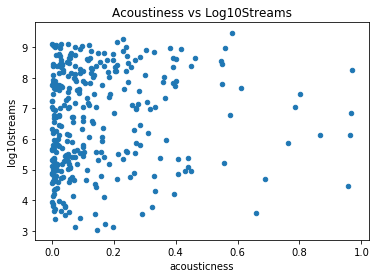

In [17]:
plt.figure()
# create the new column for the log of streams
data_df['log10streams'] = np.log10(data_df['streams'])
data_df.plot.scatter(x='acousticness', y='log10streams')
plt.title("Acoustiness vs Log10Streams")
plt.show()

The Seaborn package also gives us the ability to plot what is known as a joint plot which gives us a visualization of the density of the number of data points for certain values of the streams and acousticness.

It also gives us the distribution of each variable along the opposite edge of the axes as seen below.

<Figure size 432x288 with 0 Axes>

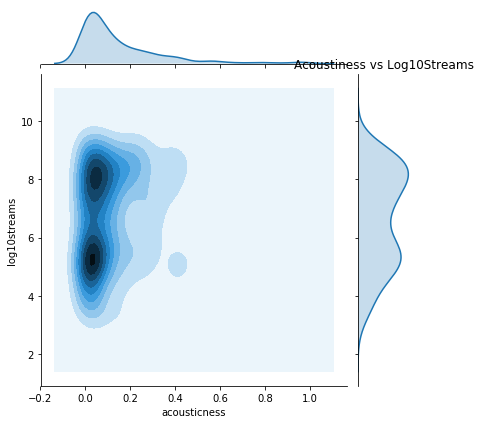

In [18]:
plt.figure()
sns.jointplot(x="acousticness", y="log10streams", data=data_df, kind="kde")
plt.title("Acoustiness vs Log10Streams")
plt.show()

As we can see from the visualizations, people seem to favor songs with low acousticness.

### Danceability vs. Streams

We will now perform the same analysis to see the relationship between the danceability of a song and how popular it is.

<Figure size 432x288 with 0 Axes>

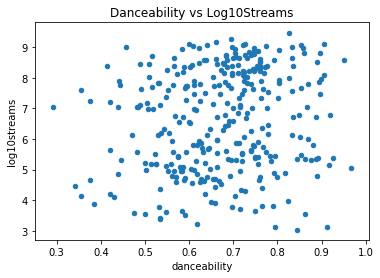

In [19]:
plt.figure()
data_df['log10streams'] = np.log10(data_df['streams'])
data_df.plot.scatter(x='danceability', y='log10streams')
plt.title("Danceability vs Log10Streams")
plt.show()

<Figure size 432x288 with 0 Axes>

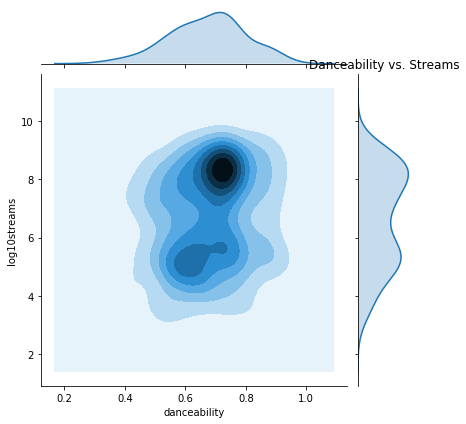

In [20]:
plt.figure()
sns.jointplot(x="danceability", y="log10streams", data=data_df, kind="kde")
plt.title("Danceability vs. Streams")
plt.show()

As we can see, the danceability distribution reachs its peak in the interval(0.6 ~ 0.8). This means that people tend to like songs with higher danceability.

### Valence vs. Streams

Next we will compare valence of a song and its popularity (streams).

<Figure size 432x288 with 0 Axes>

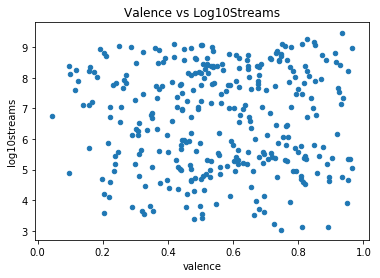

In [21]:
plt.figure()
data_df['log10streams'] = np.log10(data_df['streams'])
data_df.plot.scatter(x='valence', y='log10streams')
plt.title("Valence vs Log10Streams")
plt.show()

<Figure size 432x288 with 0 Axes>

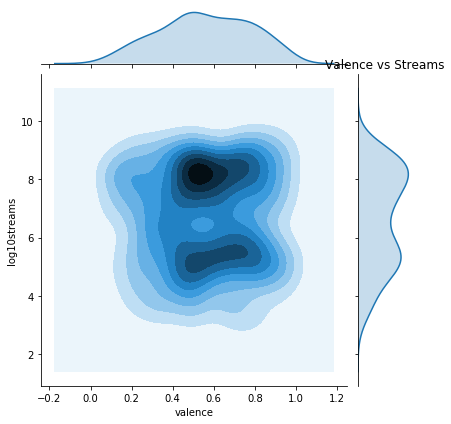

In [22]:
plt.figure()
sns.jointplot(x="valence", y="log10streams", data=data_df, kind="kde")
plt.title("Valence vs Streams")
plt.show()

From the figure above, we can see that people favor songs with 0.5 valence

### Liveness vs Streams

<Figure size 432x288 with 0 Axes>

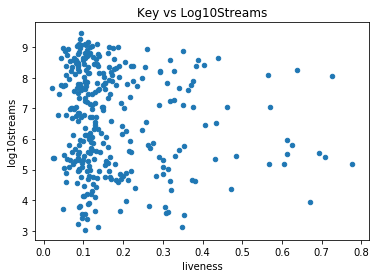

In [23]:
plt.figure()
data_df['log10streams'] = np.log10(data_df['streams'])
data_df.plot.scatter(x='liveness', y='log10streams')
plt.title("Key vs Log10Streams")
plt.show()

<Figure size 432x288 with 0 Axes>

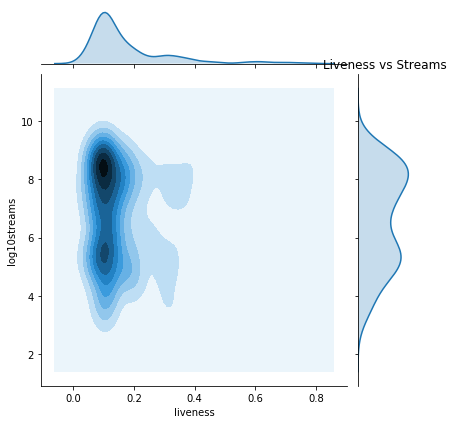

In [24]:
plt.figure()
sns.jointplot(x="liveness", y="log10streams", data=data_df, kind="kde")
plt.title("Liveness vs Streams")
plt.show()

From the figure above, we can see that popular songs usually do not have much of a live aspect to them.

### Energy vs. Streams

<Figure size 432x288 with 0 Axes>

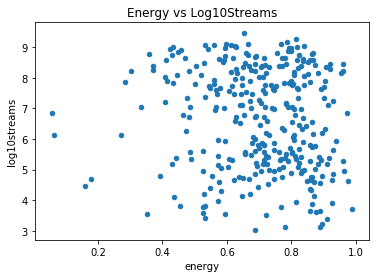

In [25]:
plt.figure()
data_df['log10streams'] = np.log10(data_df['streams'])
data_df.plot.scatter(x='energy', y='log10streams')
plt.title("Energy vs Log10Streams")
plt.show()

<Figure size 432x288 with 0 Axes>

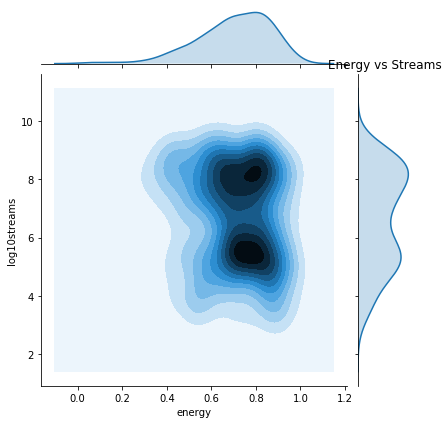

In [26]:
plt.figure()
sns.jointplot(x="energy", y="log10streams", data=data_df, kind="kde")
plt.title("Energy vs Streams")
plt.show()

From the figure, we find out that people tend to love songs with higher energy around(0.6 ~ 0.8)

### Genre Analysis

Finally, using the data we scraped from Wikipedia, we will visualize what the most popular genre of music is as an added analysis into music.

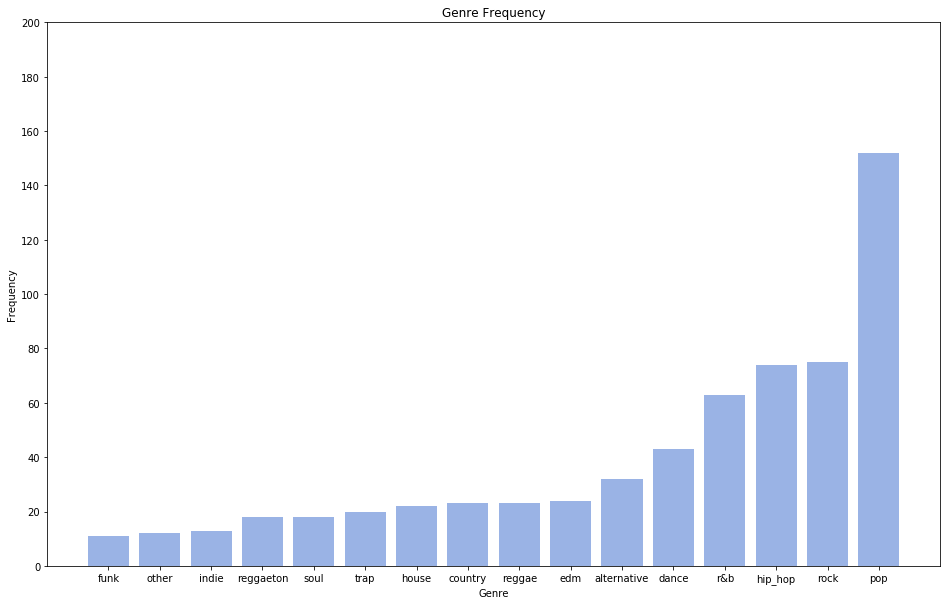

In [27]:
f, ax = plt.subplots(figsize=(16,10))

plt.bar(genre_df['Genre'], genre_df['Frequency'], color = '#9ab3e5')
ax.set_title("Genre Frequency")
ax.set_xlabel("Genre")
ax.set_ylabel("Frequency")
ax.set_yticks([0,20,40,60,80,100,120,140,160,180,200])
plt.show()

From the figure above we can see that pop is easily the most popular genre, with almost double the count of the next closest genre, rock.

# Results and Analysis

### Building and testing different prediction models

After visually exploring features that have strong correlation with streams, we decided to make a model that can predict a song's popularity with certain features.

In order to categorize key and time_signature better, here we are using one-hot encoding to approach this more accurately

In [28]:
#One hot encoding for key
temp_key = pd.DataFrame()
temp_key = pd.get_dummies(data_df['key'],prefix='key')
data_df = pd.concat([data_df, temp_key],axis=1)
data_df.drop('key',axis=1,inplace=True)
#One hot encoding for time_signature
temp_ts = pd.DataFrame()
temp_ts = pd.get_dummies(data_df['time_signature'],prefix='time_signature')
data_df = pd.concat([data_df, temp_ts],axis=1)
data_df.drop('time_signature',axis=1,inplace=True)

#### Analyzing which variables are correlated
We will once again revisit the correlation of all the features of a song to see which features we should include in our prediction models.

In [29]:
corr = data_df.corr()
corr['streams'].sort_values(ascending=False)

streams             1.000000
log10streams        0.600581
danceability        0.160630
key_2               0.129245
valence             0.099749
key_1               0.082666
acousticness        0.081596
time_signature_4    0.067266
loudness            0.050477
key_5               0.043009
key_8               0.023590
speechiness         0.017070
key_0               0.001162
mode               -0.002829
key_3              -0.019467
key_6              -0.026538
instrumentalness   -0.029833
key_11             -0.031302
duration           -0.041627
time_signature_5   -0.044947
key_7              -0.048318
time_signature_3   -0.049262
key_4              -0.050166
tempo              -0.054338
key_9              -0.059018
key_10             -0.064864
energy             -0.074209
liveness           -0.137364
Name: streams, dtype: float64

According the result above, we can see that danceability, key_2, valence, key_1, acousticness, time_signature_4.0 and loudness have comparatively stronger positive correlation with streams. However, liveness seems to have the strongest negative correlation with streams.

From here, we can start builing our training model

First, lets define a standard to determine if a song is popular. For this we decided to use the median number of streams to determine if a song is popular or not.

In [30]:
print("The mean of streams is: " + str(data_df['streams'].mean()))
print("The median of streams is: " + str(data_df['streams'].median()))

The mean of streams is: 154366966.591
The median of streams is: 6141094.0


We now consider those songs with streams higher than 6103004 to be popular, represented by 1, and those with lower streams to be not popular, represented by 0. 
Using this information, we update the dataframe to include a new column that contains this popularity information.

We write a function that will use this threshold and determine the popularity of every song in our dataset.

In [31]:
def convert_label(label):
    if label >= 6103004:
        return 1.0
    else:
        return 0.0

data_df['popularity'] = data_df['streams'].apply(convert_label)
data_df.head()


,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_3,time_signature_4,time_signature_5,popularity
0,0.01020,0.833,204.600,0.434,0.021900,0.165,-8.795,1,0.4310,150.062,...,0,0,0,0,0,0,0,1,0,1.0
1,0.19900,0.743,326.933,0.359,0.006110,0.137,-10.401,1,0.0794,160.083,...,0,0,0,0,0,0,0,1,0,1.0
2,0.00479,0.804,251.333,0.560,0.000000,0.164,-6.682,1,0.1850,85.023,...,0,0,1,0,0,0,0,1,0,1.0
3,0.01450,0.739,241.400,0.472,0.000007,0.207,-11.204,1,0.1560,80.030,...,0,0,0,0,0,0,0,1,0,0.0
4,0.36600,0.762,243.270,0.476,0.000000,0.103,-12.686,1,0.1140,130.007,...,0,0,0,0,0,0,0,1,0,1.0


We will now create a new independent dataset for our prediction models that will only contain the features that we will be using to predict the popularity of a song.

We will use the standard 80% of our dataset to train our prediction model and test our model on the remaning 20% of our data.

In [32]:
data_df_train = pd.concat([data_df['danceability'], data_df['key_2'], 
                            data_df['valence'], data_df['key_1'], data_df['acousticness'], 
                            data_df['time_signature_4'], data_df['loudness']], axis = 1)

#Here we use 80% of data for training and 20% for testing
num_training = int(len(data_df)*0.8)
num_testing = len(data_df) - num_training
source_X = data_df_train[['danceability', 'key_2', 'valence', 'key_1', 'acousticness', 'time_signature_4', 'loudness']]
source_y = data_df['popularity']

source_X

,danceability,key_2,valence,key_1,acousticness,time_signature_4,loudness
0,0.833,1,0.286,0,0.010200,1,-8.795
1,0.743,0,0.588,1,0.199000,1,-10.401
2,0.804,0,0.264,0,0.004790,1,-6.682
3,0.739,0,0.308,1,0.014500,1,-11.204
4,0.762,0,0.367,0,0.366000,1,-12.686
5,0.662,0,0.351,0,0.440000,1,-8.317
6,0.782,0,0.237,0,0.051600,1,-7.467
7,0.853,0,0.677,1,0.056500,1,-7.535
8,0.715,1,0.607,0,0.006310,1,-5.379
9,0.676,0,0.301,0,0.246000,1,-8.699


Using this dataset we can use sklearn for training and testing. Here, we have two options, SVM and logistic regression. 
We will create both models and determine which is better for predicting the popularity of a song.

We will begin with creating the test and training datasets for the two models we intend on comparing.

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
#This is for logistic regression
df_train_X, df_test_X, df_train_y, df_test_y = train_test_split(source_X, source_y, test_size = 0.2)

#This is for SVM
df_train_SVM_X = source_X[:num_training]
df_train_SVM_y = source_y[:num_training]
df_test_SVM_X = source_X[:num_testing]
df_test_SVM_y = source_y[:num_testing]

We will then complete the training process of the two models.

In [34]:
from sklearn.linear_model import LogisticRegression, LinearRegression
# Logistic Regression training
model = LogisticRegression()
model.fit(df_train_X, df_train_y)

# SVM Training
def train_SVM(X, y, kernel='linear'):
    clf = SVC(kernel=kernel)
    clf.fit(X, y)
    return clf

model1 = train_SVM(df_train_SVM_X, df_train_SVM_y)

Now, we are able to make predictions and compare.

In [35]:
# predict class labels for the test set
pred_train_y = model.predict(df_train_X)
pred_test_y = model.predict(df_test_X)
pred_train_SVM_y = model1.predict(df_train_SVM_X)
pred_test_SVM_y = model1.predict(df_test_SVM_X)

Let's evaluate the model by reviewing the classification report or confusion matrix. First is the classification report of logistic regression model.

In [36]:
from sklearn.metrics import classification_report
print(classification_report(df_train_y, pred_train_y))
print(classification_report(df_test_y, pred_test_y))

             precision    recall  f1-score   support

        0.0       0.55      0.28      0.37       121
        1.0       0.56      0.80      0.65       137

avg / total       0.55      0.55      0.52       258

             precision    recall  f1-score   support

        0.0       0.69      0.28      0.39        40
        1.0       0.41      0.80      0.54        25

avg / total       0.58      0.48      0.45        65



Then we have the SVM model.

In [37]:
print(classification_report(df_train_SVM_y, pred_train_SVM_y))
print(classification_report(df_test_SVM_y, pred_test_SVM_y))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       109
        1.0       0.58      1.00      0.73       149

avg / total       0.33      0.58      0.42       258

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        45
        1.0       0.31      1.00      0.47        20

avg / total       0.09      0.31      0.14        65



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


From the result above, we can confidently say that logistic regression model can predict a song's popularity and it has 60% accuracy even based on a small amount of training data. On the other hand, SVM performed badly in comparison with logistic regression model.

Hence, we conclude that logistic regression model can predict a song's popularity with fairly reliable accuracy (~60%).

### Summary of Results

We had to use a variety of different visualizations for our analysis. We used scatterplots and joint plots in order to visualize the correlation between the different features of a song and the number of streams it got/its popularity. We chose the features that we needed to analyze by creating a correlation matrix that displayed the features that were most related to the number of streams.
From this, we learned that the acousticness, valence and danceability of a song are positively correlated to the number of streams it receives and that the danceability is the most impactful. It was clear that most popular songs had a high danceability factor to them.

We also noticed that energy and liveness were strongly negatively correlated to the popularity of a song. It was very clear from the visualizations that most popular songs in 2017 did not have a large live aspect to them.

As a bonus analysis, we also looked into the most popular genres of music and got the predictable outcome of **pop** music being the most **pop**ular followed by rock and hip-hop.

Finally, we used the information we gathered about the features that were most correlated to the number of streams a song got to answer the question of whether we could predict the popularity of song on the basis of its attributes. We created two prediction models (SVM and Logical Regression) and noticed that the logical regression model was able to predict the popularity of a song with an accuracy of ~60% on our very limited dataset. We considered this to be fairly accurate as it is better than a coin flip and due to the small size of our dataset.

# Ethical Considerations

The data sets that we used had a large amount of songs, however we only collect a top section of each of the data sets from 2017. We only used data in one year and did not collect all of the songs that year, so it might skew the data meaning we unintentionally created a bias.  In addition, music has changed much throughout history, therefore we can only understand the music trends in the more recent years due to are selective data. There is no guarantee that these variables we find will continue to hold the same weight on music in the future as they due now. There is reason to believe that these findings could ultimately be misleading in the near future because of the data we have selected. Consider the case that we are solely using 2017 spotify music data, our findings may be limited to possibly this decade and spotify web media player. Other music players may have different trends due to their users identity, music taste or income level. However, Spotify is one of the most used streaming services in the United States and the world, so its data can not be completely disregarded. Spotify is a quality streaming service to collect data from and make generalizations for the population. Another consideration is that music companies and artists may benefit from our research by tailoring their songs to the public's taste in order to make money. Music types may be limited to certain types after we publish our research results. If students in a Cogs data science course can draw these conclusions, then other entities may be able to use our analysis and change the music industry as a whole. The industry has already been criticised for not being a very diverse culture and we may be unfortunately benefiting that narrative. 


# Conclusion and Discussion

Our project investigated the features of a song that made it popular such as its energy, loudness, acoustic ness, etc. We strived to find whether these features could be used to accurately predict the popularity of a given song in 2017. We used a dataset that contained the attribute information for about 2000 songs from Spotify in the year 2017 and combined that with stream data we found about the number of daily streams the top 200 songs on Spotify got for the year 2017. We accumulated the number of streams for each song and finally merged the datasets to create our working dataset. This made the data set smaller, but it also focused our analysis. As an additional analysis, we also web scraped off Wikipedia to see which genre of music is the most popular. This was an added question because we wanted to understand which kind of music genre is better at using these different variables inside their music.

From our analysis, we learned that there are certain features of a song in 2017 that made it more popular than others. We hypothesized that the danceability, tempo and energy of a song would be the most significant features that would predict the popularity of a song. Upon crunching the data, while we were correct in our assumption of danceability playing a major role, tempo and energy played a less significant role than we anticipated. As it turned out, the liveness and acoustic ness of a song played a bigger role in the popularity of a song. This was a bit of a surprise because it does not look like the obvious choice. People were not as interested in dancing or tempo but the acoustic ness. The sound seems to provide a more happy feel that listeners seemed to engage with more. Also, to answer our interesting question, pop was by far, according to our definition of popularity, the most popular musical genre by far. Rock was second, but it was only at about half of the popularity as pop. All the other musical categories were not really that close. 

In addition, our hypothesis regarding whether the popularity of a song can be predicted using its features was proven partially correct as using our logical regression prediction model, we were able to predict the popularity of a song using features such as danceability, acoustic ness and valence with an accuracy of ~60%. While this is not a very accurate, it has a lot to do with the limited size of our dataset and we believe that given a larger dataset, the prediction accuracy would rise to 80% or 90%. Despite our initial hypothesis being somewhat wrong the variables that we thought would not contribute to popularity did. We were able to construct a reliable prediction model based off of these components, despite the fact we thought other factors would contribute more. 

All in all, our analysis had some very useful conclusions to draw from. Looking back on it there could have been some extra steps to improve this project and we would probably start with the data itself. We had used a relatively small data set because it was only significant for one year and it was not the full list of songs in that year. There definitely was some more data out there that we could have found to create a better analysis and prediction, but we made our data work. Also, to add some more complexity we could have added some different types of streaming services. This would allow for a better analysis because we could create some better generalizations for the population. Also maybe choosing a different variable to account for popularity. Streams looks to be an easy choice, but just because someone streams it doesn't make it the popular. Some streams could have been someone accidentally streamed it or maybe someone has left it on repeat while away. While it is possible that it is the most popular song, maybe a like to dislike ratio for the song would have been a more useful variable to consider. Even though this was not a perfect project we were still able to draw some valuable conclusions about it. 

